In [2]:
###
# Guys, we can work on this notebook the same way we did on the pipeline functions script file

# EDA

## Questions

- What are the most common risk factors?
- What’s the proportion of patients holding risk (and similar) factors that may affect treatment and diseases?
- How do risk factors relate to demographics?
- What is the proportion of patients who were affected by the treatment and had a fracture?
- What is the proportion of patients who were affected by the treatment, decreasing their t-score?

In [1]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
seaborn.set(style='ticks')

In [2]:
path_to_file = "../week 9/data_cleaned.csv"

In [3]:
df = pd.read_csv(path_to_file)
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,0,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,2,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,1,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,1,0,0,0,0,0,0,0,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,0,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,0,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 66 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   int64 
 7   Ntm_Speciality          

### Most common risk/comorbidity/concomitant factors

In [8]:
subset = df.iloc[:,20:]

subset.iloc[:,:-1].sum().sort_values(ascending=False) / subset.shape[0]

Injectable_Experience_During_Rx                                       0.892523
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias       0.515479
Risk_Vitamin_D_Insufficiency                                          0.477804
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms                0.447722
Comorb_Encounter_For_Immunization                                     0.441881
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx       0.394860
Concom_Narcotics                                                      0.360105
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations           0.345210
Comorb_Vitamin_D_Deficiency                                           0.319217
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified                  0.291764
Concom_Systemic_Corticosteroids_Plain                                 0.284171
Concom_Anti_Depressants_And_Mood_Stabilisers                          0.280082
Comorb_Osteoporosis_without_current_pathological_fra

We can easily see that most of the patients already hold comorbility factors, while holding risk factors is less common.

Some highlights:
- The main comorbility factor is related to lipoproteins and metabolism (cholesterol).
- The main risk factor is deficiency in vitamin D.
- More than one third has been found to have taken narcotics

### Patients holding one factor at least

In [9]:
subset.iloc[:,:-1][subset.sum(axis=1) >= 1].shape[0] / subset.shape[0]

0.9938668224299065

99 % of our sample hold at least one risk, comorbidity and/or concomitant factor.

### How do risk factors relate to demographics?

In [10]:
cols = [col for col in subset.iloc[:,:-1].columns]

In [11]:
df.groupby('Gender')[cols].sum().T.sort_values(by='Female', ascending=False).agg(
    {'Female': [lambda x: x / df[df.Gender == 'Female'].shape[0]],
     'Male': [lambda x: x / df[df.Gender == 'Male'].shape[0]]})

,Female,Male
,<lambda>,<lambda>
Injectable_Experience_During_Rx,0.891950,0.902062
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,0.517647,0.479381
Risk_Vitamin_D_Insufficiency,0.481734,0.412371
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,0.460991,0.226804
Comorb_Encounter_For_Immunization,0.441176,0.453608
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",0.388854,0.494845
Concom_Narcotics,0.359133,0.376289
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,0.344272,0.360825
Comorb_Vitamin_D_Deficiency,0.322910,0.257732


There are some significant differences between genders:
- Women seem to be more affected by vitamin D deficiencies.
- More than twice as many women as men have passed as screening for malignant neoplasms.
- Four times as many men as women suffer from Hypogonadism (untreated).

In [12]:
df.groupby('Age_Bucket')[cols].sum().T

Age_Bucket,0,1,2,3
Injectable_Experience_During_Rx,1285,965,656,150
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,500,595,361,77
Comorb_Encounter_For_Immunization,693,517,257,46
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",551,447,304,50
Comorb_Vitamin_D_Deficiency,443,360,238,52
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,423,349,187,40
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,256,269,226,40
Comorb_Long_Term_Current_Drug_Therapy,374,254,160,29
Comorb_Dorsalgia,364,248,131,36
Comorb_Personal_History_Of_Other_Diseases_And_Conditions,301,216,128,32


As expected, patients older than 65 are affected by the mentioned factores in a higher proportion.

In [13]:
df.groupby('Region')[cols].sum().T.agg(
    {'Midwest': [lambda x: x / 1383],
     'Northeast': [lambda x: x / 232],
    'Other/Unknown': [lambda x: x / 60],
    'South': [lambda x: x / 1247],
    'West': [lambda x: x / 502]})

,Midwest,Northeast,Other/Unknown,South,West
,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>
Injectable_Experience_During_Rx,0.889371,0.969828,0.950000,0.866079,0.924303
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,0.449024,0.383621,0.516667,0.420209,0.533865
Comorb_Encounter_For_Immunization,0.422993,0.383621,0.633333,0.400160,0.601594
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",0.367317,0.331897,0.500000,0.368083,0.553785
Comorb_Vitamin_D_Deficiency,0.270427,0.301724,0.400000,0.392141,0.270916
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,0.279826,0.258621,0.266667,0.270249,0.396414
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,0.236443,0.284483,0.216667,0.166800,0.352590
Comorb_Long_Term_Current_Drug_Therapy,0.269704,0.193966,0.366667,0.211708,0.225100
Comorb_Dorsalgia,0.233550,0.215517,0.283333,0.174018,0.342629


There are some risks and other factors that seem to be significantly higher in South and West regions. It might be interesting to find out about socioeconomic factors aside.

In [14]:
df.groupby('Race')[cols].sum().T.agg(
    {'African American': [lambda x: x / 95],
     'Asian': [lambda x: x / 84],
    'Caucasian': [lambda x: x / 3148],
    'Other/Unknown': [lambda x: x / 97]})

,African American,Asian,Caucasian,Other/Unknown
,<lambda>,<lambda>,<lambda>,<lambda>
Injectable_Experience_During_Rx,0.926316,0.880952,0.894854,0.793814
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,0.484211,0.464286,0.447268,0.412371
Comorb_Encounter_For_Immunization,0.421053,0.607143,0.438691,0.422680
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",0.336842,0.571429,0.391995,0.391753
Comorb_Vitamin_D_Deficiency,0.463158,0.297619,0.314485,0.350515
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,0.294737,0.380952,0.286531,0.381443
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,0.242105,0.309524,0.228717,0.226804
Comorb_Long_Term_Current_Drug_Therapy,0.210526,0.202381,0.240470,0.237113
Comorb_Dorsalgia,0.178947,0.261905,0.229034,0.195876


There seem to be some remarkable differences between Asian and other races. They are probably due to cultural factors and other behaviours, like medical reviews on a more regular basis (this is just a hypothesis to be found out).

### What is the proportion of patients who were affected by the treatment and had a fracture?

In [40]:
df_g = df[['Frag_Frac_Prior_Ntm','Frag_Frac_During_Rx','Tscore_Bucket_Prior_Ntm','Tscore_Bucket_During_Rx','Persistency_Flag']]
df_g.loc[df_g['Frag_Frac_During_Rx'] > df_g['Frag_Frac_Prior_Ntm'], 'Frag_consecu'] = 'Yes'
df_g.loc[df_g['Frag_Frac_During_Rx'] <= df_g['Frag_Frac_Prior_Ntm'], 'Frag_consecu'] = 'No'
df_g.loc[df_g['Tscore_Bucket_Prior_Ntm'] > df_g['Tscore_Bucket_During_Rx'], 'tscore_dis'] = 'Yes'
df_g.loc[df_g['Tscore_Bucket_Prior_Ntm'] <= df_g['Tscore_Bucket_During_Rx'], 'tscore_dis'] = 'No'

C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

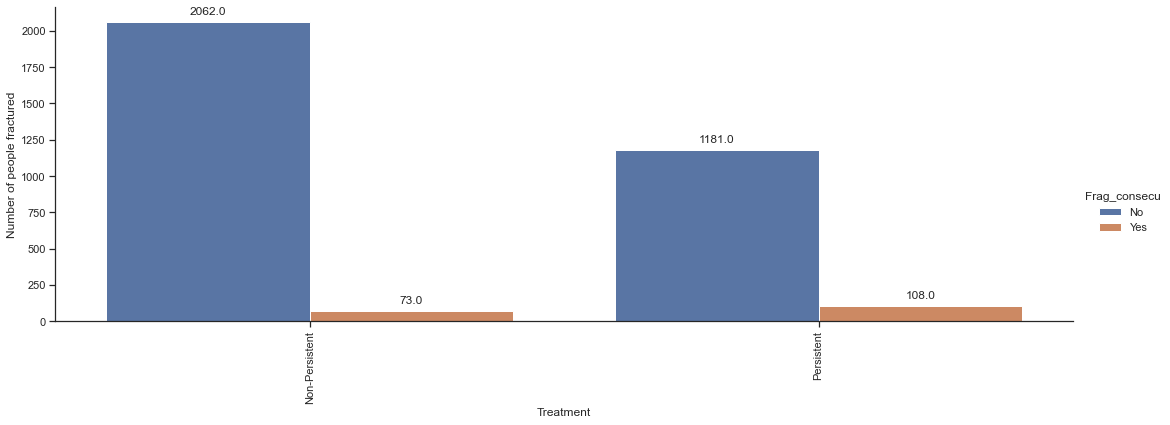

In [50]:
df_ge = df_g.groupby(['Frag_consecu','Persistency_Flag'],as_index=False).count()
fg = seaborn.catplot(x='Persistency_Flag', y='tscore_dis', hue='Frag_consecu', data=df_ge, kind='bar',aspect=3)
fg.set_xlabels('Treatment')
fg.set_ylabels('Number of people fractured')
fg.set_xticklabels(rotation=90)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Of the total number of patients, 8.38% of people were affected by the treatment, weakening their bones

### What is the proportion of patients who were affected by the treatment, decreasing their t-score?

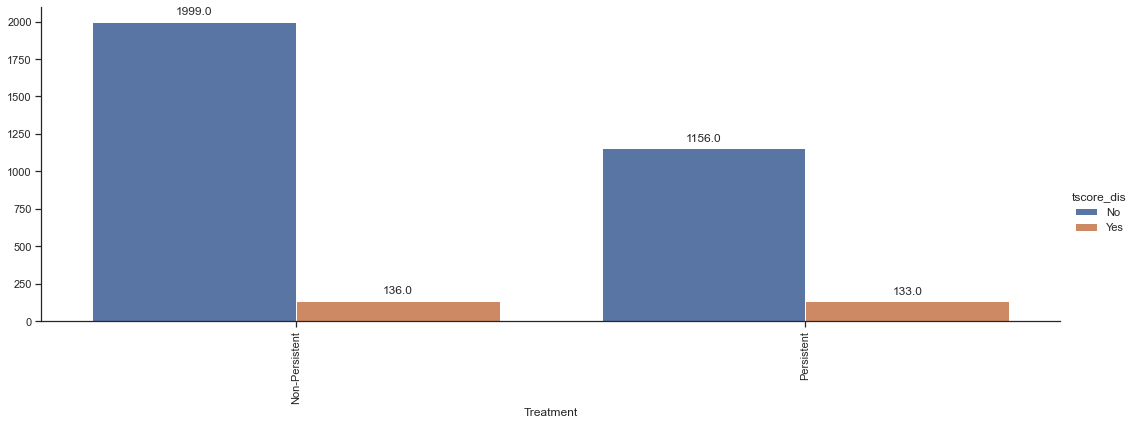

In [53]:
df_ge = df_g.groupby(['tscore_dis','Persistency_Flag'],as_index=False).count()
fg = seaborn.catplot(x='Persistency_Flag', y='Frag_consecu', hue='tscore_dis', data=df_ge, kind='bar',aspect=3)
fg.set_xlabels('Treatment')
fg.set_ylabels('')
fg.set_xticklabels(rotation=90)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

There is 10.31% of people with treatment who had a decrease in the t-score